# TAREA SEMANA 3 : FUNDAMENTOS DE PYTHON
## Nombre : Edgar Reyes Mujica

### Ejercicio 1
Escribir dos funciones que simulan una calculadora científica que permita calcular el seno, coseno, tangente, exponencial y logaritmo neperiano o natural (logaritmo en base euler). 

La función uno preguntará al usuario el intervalo donde quiere aplicar la función matemática y la función a aplicar, y mostrará por pantalla una tabla donde la primera columna será los valores del intervalo dado (x) y la columna 2 tendrá los resultados de el resultado de aplicar la función a este intervalo (y).

La función dos graficara con matplotlib el resultado de función anterior y la mostrará en pantalla. Recuerden poner los títulos ejes y demás configuraciones de las gráficas para que queden de la mejor manera posible.


In [76]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_funcion():
    
    inicio = int(input("Introduce el valor de inicio del intervalo: "))
    fin = int(input("Introduce el valor de fin del intervalo: "))
    
    funcion = input("Introduce la función que deseas aplicar (sin, cos, tan, exp, log): ")
    
    validar_funciones = ['sin', 'cos', 'tan', 'exp', 'log']
    if funcion not in validar_funciones:
        print("Función no válida")
        return
    
    values = np.arange(inicio, fin + 1)
    
    if funcion == 'sin':
        resultado = np.sin(values)
    elif funcion == 'cos':
        resultado = np.cos(values)
    elif funcion == 'tan':
        resultado = np.tan(values)
    elif funcion == 'exp':
        resultado = np.exp(values)
    elif funcion == 'log':
        resultado = np.log(values)
    
    print(f"x \t {funcion}(x)")
    print("----------------------")
    for i in range(len(values)):
        print(f"{values[i]} \t {resultado[i]}")
    
    plt.plot(values, resultado)
    plt.title(f"Grafica de la función {funcion}")
    plt.xlabel("x")
    plt.ylabel(f"{funcion}(x)")
    plt.show()

calcular_funcion()

Función no válida


Explicación: Este ejercicio solo fue cuestion de definir los rangos mediante entradas de datos y validar lo que se queria realizar mediante un if la cual comparaba la entrada de la funcion con las ya establecidas y una vez esto se validara solo se procedia a aplicar la funcion correspondiente gracias a la libreria de numpy para realizar las operaciones y obtener el resultado, al final solo se graficaba el resultado utilizando la libreria de matplotlib.

### Ejercicio 2
Escribir un programa para ver los beneficios de una empresa en un periodo de años.
El programa debe cumplir los siguientes requisitos:

A.- El programa tiene que preguntar al usuario por un año inicial y otro final, y después preguntar por los ingresos y egresos de cada año desde el año inicial hasta el año final.

   a.- Debe garantizar que por lo menos haya 5 años entre el año inicial y el final.

B.- Con los datos introducidos se deben crear un dataframe, con las columnas fecha, ingresos y egresos.

C.- El programa debe generar otra columna con el beneficio de cada año (ingresos menos egresos) y mostrarla por pantalla.

D.- El programa debe crear otra columna llamada ganancia la cuál indique para cada año si ha habido beneficios o no de manera booleana y mostrarla por pantalla.

F.- Finalmente el programa debe mostrar por pantalla la lista de los años con pérdidas.


In [5]:
import pandas as pd
import numpy as np

año_inicial = int(input("Introduce el año inicial: "))
año_final = int(input("Introduce el año final: "))

if año_final - año_inicial < 5:
    print("Error: La diferencia entre los años debe ser de al menos 5 años.")
    exit()

años = range(año_inicial, año_final+1)
ingresos = []
egresos = []
for año in años:
    ingreso = float(input(f"Ingresos en {año}: "))
    egreso = float(input(f"Egresos en {año}: "))
    ingresos.append(ingreso)
    egresos.append(egreso)

data = {'fecha': años, 'ingresos': ingresos, 'egresos': egresos}
df = pd.DataFrame(data)

df['beneficio'] = df['ingresos'] - df['egresos']

df['ganancia'] = np.where(df['beneficio'] > 0, True, False)

print(df)

año_perdida = df[df['beneficio'] < 0]['fecha']
if len(año_perdida) > 0:
    print("Años con pérdidas:")
    print(año_perdida.tolist())
else:
    print("No hubo años con pérdidas.")

   fecha  ingresos  egresos  beneficio  ganancia
0   2000     200.0    100.0      100.0      True
1   2001     200.0    100.0      100.0      True
2   2002     200.0    100.0      100.0      True
3   2003     200.0    100.0      100.0      True
4   2004     200.0    100.0      100.0      True
5   2005     100.0    200.0     -100.0     False
Años con pérdidas:
[2005]


Explicación: Este se me hizo un poco complicado ya que al momento de validar los años que tenian que ser mayores a 5 años se supone que el codigo deberia de detenerse pero esto no sucedia y no logre entender el porque, fuera de eso el codigo solo consiste en pedir el rango de años mediante unas entradas aligual que los ingresos y egresos estos se guardaban en un diccionario el cual luego lo pasamos a hacer un dataframe ya con eso solo fue cuestion de agregar otra columna al data frame donde hariamos el calculo para saber si hubo beneficios.

### Ejercicio 3
El fichero horas-trabajo.csv contiene el número de horas mensuales trabajadas por los empleados de una empresa durante el primer cuatrimestre. Crear un programa que realice las siguientes operaciones utilizando la librería Pandas:

A.- Crea una columna con el número total de horas trabajadas para cada operador.

B.- Muestra cual es el promedio de horas trabajadas en total en la empresa durante el mes Marzo

C.- Muestra cuántos operadores hay por cada departamento de la empresa.

D.- Muestra el número de empleados que han trabajado todos los meses, es decir, que tienen un número de horas todos los meses del cuatrimestre.


In [12]:
import pandas as pd
df_horas = pd.read_csv("horas-trabajo.csv", delimiter=";")
df_horas

,Id,Departamento,Enero,Febrero,Marzo,Abril
0,OP1,Proveedores,180,160.0,140.0,180.0
1,OP2,Ventas,120,140.0,NaN,100.0
2,OP3,Ventas,80,90.0,80.0,80.0
3,OP5,IT,180,170.0,180.0,180.0
4,OP6,Marketing,100,NaN,100.0,NaN
5,OP7,Ventas,160,160.0,160.0,160.0
6,OP8,Proveedores,100,80.0,110.0,80.0
7,OP9,IT,80,80.0,80.0,80.0
8,OP10,Ventas,180,160.0,180.0,180.0


In [13]:
df_horas["Total_horas"] = df_horas.sum(axis=1, skipna=True, numeric_only=True)
df_horas


,Id,Departamento,Enero,Febrero,Marzo,Abril,Total_horas
0,OP1,Proveedores,180,160.0,140.0,180.0,660.0
1,OP2,Ventas,120,140.0,NaN,100.0,360.0
2,OP3,Ventas,80,90.0,80.0,80.0,330.0
3,OP5,IT,180,170.0,180.0,180.0,710.0
4,OP6,Marketing,100,NaN,100.0,NaN,200.0
5,OP7,Ventas,160,160.0,160.0,160.0,640.0
6,OP8,Proveedores,100,80.0,110.0,80.0,370.0
7,OP9,IT,80,80.0,80.0,80.0,320.0
8,OP10,Ventas,180,160.0,180.0,180.0,700.0


In [14]:
promedio_marzo = df_horas["Marzo"].mean(skipna=True)
print("El promedio de horas trabajadas en marzo es:", promedio_marzo)

El promedio de horas trabajadas en marzo es: 128.75


In [15]:
conteo_operadores = df_horas["Departamento"].value_counts()
print("Número de operadores por departamento:\n", conteo_operadores)

Número de operadores por departamento:
 Departamento
Ventas         4
Proveedores    2
IT             2
Marketing      1
Name: count, dtype: int64


In [16]:
empleados_completos = df_horas[df_horas.notnull().all(axis=1)]
num_empleados_completos = empleados_completos["Id"].count()
print("Número de empleados que han trabajado todos los meses:", num_empleados_completos)
print(empleados_completos)

Número de empleados que han trabajado todos los meses: 7
     Id Departamento  Enero  Febrero  Marzo  Abril  Total_horas
0   OP1  Proveedores    180    160.0  140.0  180.0        660.0
2   OP3       Ventas     80     90.0   80.0   80.0        330.0
3   OP5           IT    180    170.0  180.0  180.0        710.0
5   OP7       Ventas    160    160.0  160.0  160.0        640.0
6   OP8  Proveedores    100     80.0  110.0   80.0        370.0
7   OP9           IT     80     80.0   80.0   80.0        320.0
8  OP10       Ventas    180    160.0  180.0  180.0        700.0


Explicación: Este ejercicio senti que fue mas para poner en practica todas las funciones que podemos aplicar a un dataframe asi como el utilizar las columnas por si solas del dataframe para obtener informacion o filtrarla.

### Ejercicio 4
Crear un programa utilizando la librería Pandas y Matplotlib que realice lo siguiente:

A.- Crear el siguiente DataFrame indexado:

Dia         Calorias    Tiempo

Lunes       420         60

Martes      380         40

Miercoles   390         75

Jueves      490         55

Viernes     300         45


B.- Calcular la media, mediana y desviación típica de ambas columnas.

C.- Añadir otra columna booleana al DataFrame para ver si se ha cumplido el reto de quemar más de 400 calorías por hora. La nueva columna debe generarse aplicando una fórmula a las otras columnas. 

D.- Filtrar el DataFrame y devolver otro DataFrame con las filas que cumplan que el número de calorías es mayor de 400.

E.- Añadir otra columna con los porcentajes de días que se ha conseguido el reto y los que no.

F.- Crear un gráfico donde se  muestre la progresión de las calorías y tiempo durante la semana.



In [8]:
import pandas as pd

dias = ['Lunes','Martes', 'Miercoles', 'Jueves', 'Viernes']
caloria = [420, 380, 390, 490, 300]
minutos = [60, 40, 75, 55, 45]
data = {'Dia':dias, 'Calorias':caloria, 'Tiempo': minutos}
df = pd.DataFrame(data)
df

,Dia,Calorias,Tiempo
0,Lunes,420,60
1,Martes,380,40
2,Miercoles,390,75
3,Jueves,490,55
4,Viernes,300,45


In [48]:
media_calorias = df['Calorias'].mean()
print('La media de calorias es:', media_calorias)
mediana_calorias = df['Calorias'].median()
print('La mediana de calorias es:', mediana_calorias)
std_calorias = df['Calorias'].std()
print('La desviacion tipica de calorias es:', std_calorias)
print('-----------------------')
media_tiempo = df['Tiempo'].mean()
print('La media de tiempo es:', media_tiempo)
mediana_tiempo = df['Tiempo'].median()
print('La media de tiempo es:', mediana_tiempo)
std_tiempo = df['Tiempo'].std()
print('La desviacion tipica del tiempo es:', std_tiempo)


La media de calorias es: 396.0
La mediana de calorias es: 390.0
La desviacion tipica de calorias es: 68.7749954561976
-----------------------
La media de tiempo es: 55.0
La media de tiempo es: 55.0
La desviacion tipica del tiempo es: 13.693063937629153


In [53]:
df['Reto'] = df['Calorias'] / df['Tiempo'] >= 6.666
df

,Dia,Calorias,Tiempo,Reto
0,Lunes,420,60,True
1,Martes,380,40,True
2,Miercoles,390,75,False
3,Jueves,490,55,True
4,Viernes,300,45,True


In [54]:
df_filtro = df.loc[df['Calorias'] > 400]
df_filtro

,Dia,Calorias,Tiempo,Reto
0,Lunes,420,60,True
3,Jueves,490,55,True


In [75]:
df['Porcentaje cumplido'] = ((df['Calorias'] / df['Tiempo']) * 100)/(400/60)
df

,Dia,Calorias,Tiempo,Reto,Porcentaje cumplido
0,Lunes,420,60,True,105.000000
1,Martes,380,40,True,142.500000
2,Miercoles,390,75,False,78.000000
3,Jueves,490,55,True,133.636364
4,Viernes,300,45,True,100.000000


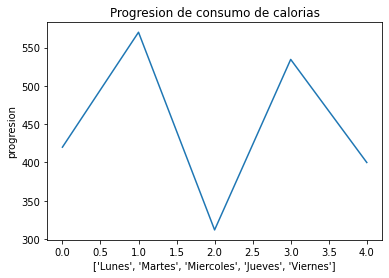

In [70]:
import matplotlib.pyplot as plt

progresion = df['Porcentaje cumplido']*4
progresion.plot()
plt.title('Progresion de consumo de calorias')
plt.xlabel(dias)
plt.ylabel('progresion')
plt.show()



Explicación: Este ejercicio fue sencillo ya que solo cree un diccionario con los valores dados y despues de eso lo volvi un DataFrame aunque quizas si hubieran sido varias columnas o filas me hubiera costado mucho mas. En la parte de donde se pide la media, mediana y desviacion estandar tambien pude hacerlo con la funcion describe() pero no sabia si esa era la intencion y como el describe te da mas informacion de la solicitada decidi aplicar las funciones por separado a la columna indicada. Al final para todas las operaciones que se pedian solo utilice regla de 3 para saber los porcentajes y solo utilice los datos que ya se sabia para aplicarlo, lo que se me dificulto un poco fue la grafica ya que se pedia que se graficara toda la informacion que teniamos y no supe si fue correcto lo que aplique.

### Ejercicio 5
El fichero coches.csv contiene información sobre los modelos de coches vendidos en USA durante un determinado año. Se pide:

A.- Crear un DataFrame a partir del fichero anterior.

B.- Eliminar las filas con valores desconocidos y mostrar el número de filas del DataFrame resultante.

C.- Crear una columna con el precio en euros (cambio 1$ = 0.94€)

D.- Mostrar las 10 últimas filas del DataFrame.

E.- Mostrar el número de marcas de coches que contiene el DataFrame.

F.- Mostrar el número de modelos de cada marca que hay en el DataFrame, de mayor a menor frecuencia.

G.- Mostrar cuál es la marca y el modelo del coche más caro.

H.- Mostrar el precio medio en euros de los coches agrupando por marca y ordenando de menor a mayor precio.

I.- Gráfica el diagrama de barras del porcentaje de modelos de cada marca.

J.- Gráfica el diagrama de dispersión de la potencia y el precio.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df_coches = pd.read_csv('coches.csv', delimiter=";")
df_coches

,Marca,Modelo,Tipo,Potencia,Precio
0,Acura,MDX,SUV,265.0,33337.0
1,Acura,RSX Type S 2dr,Sedan,200.0,21761.0
2,Acura,TSX 4dr,Sedan,200.0,24647.0
3,Acura,TL 4dr,Sedan,270.0,30299.0
4,Acura,3.5 RL 4dr,Sedan,225.0,39014.0
...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,197.0,38203.0
424,Volvo,C70 HPT convertible 2dr,Sedan,242.0,40083.0
425,Volvo,S80 T6 4dr,Sedan,268.0,42573.0
426,Volvo,V40,Wagon,170.0,24641.0


In [27]:
df_coches.dropna(inplace=True)
num_filas = len(df_coches)
print(num_filas)

421


In [28]:
df_coches['precio_euros'] = df_coches['Precio'] * 0.94
df_coches

,Marca,Modelo,Tipo,Potencia,Precio,precio_euros
0,Acura,MDX,SUV,265.0,33337.0,31336.78
1,Acura,RSX Type S 2dr,Sedan,200.0,21761.0,20455.34
2,Acura,TSX 4dr,Sedan,200.0,24647.0,23168.18
3,Acura,TL 4dr,Sedan,270.0,30299.0,28481.06
4,Acura,3.5 RL 4dr,Sedan,225.0,39014.0,36673.16
...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,197.0,38203.0,35910.82
424,Volvo,C70 HPT convertible 2dr,Sedan,242.0,40083.0,37678.02
425,Volvo,S80 T6 4dr,Sedan,268.0,42573.0,40018.62
426,Volvo,V40,Wagon,170.0,24641.0,23162.54


In [29]:
ultimas_10 = df_coches.tail(10)
print(ultimas_10)

     Marca                   Modelo   Tipo  Potencia   Precio  precio_euros
418  Volvo              S60 2.5 4dr  Sedan     208.0  29916.0      28121.04
419  Volvo               S60 T5 4dr  Sedan     247.0  32902.0      30927.88
420  Volvo                S60 R 4dr  Sedan     300.0  35382.0      33259.08
421  Volvo              S80 2.9 4dr  Sedan     208.0  35542.0      33409.48
422  Volvo             S80 2.5T 4dr  Sedan     194.0  35688.0      33546.72
423  Volvo  C70 LPT convertible 2dr  Sedan     197.0  38203.0      35910.82
424  Volvo  C70 HPT convertible 2dr  Sedan     242.0  40083.0      37678.02
425  Volvo               S80 T6 4dr  Sedan     268.0  42573.0      40018.62
426  Volvo                      V40  Wagon     170.0  24641.0      23162.54
427  Volvo                     XC70  Wagon     208.0  33112.0      31125.28


In [30]:
num_marcas = len(df_coches['Marca'].value_counts())
print(num_marcas)

38


In [31]:
num_modelos = df_coches.groupby('Marca')['Modelo'].nunique().sort_values(ascending=False)
print(num_modelos)

Marca
Toyota           28
Chevrolet        27
Mercedes-Benz    24
Ford             23
BMW              19
Audi             19
Nissan           17
Honda            16
Volkswagen       15
Chrysler         14
Dodge            13
Mitsubishi       13
Volvo            12
Hyundai          12
Jaguar           12
Kia              11
Mazda            11
Pontiac          10
Subaru           10
Lexus            10
Lincoln           9
Buick             9
Mercury           9
Cadillac          8
Suzuki            8
GMC               8
Saturn            8
Saab              7
Porsche           7
Infiniti          7
Acura             7
Oldsmobile        3
Land Rover        3
MINI              2
Scion             2
Isuzu             2
Jeep              2
Hummer            1
Name: Modelo, dtype: int64


In [32]:
coche_mas_caro = df_coches.loc[df_coches['Precio'].idxmax(), ['Marca', 'Modelo']]
print(coche_mas_caro)

Marca         Porsche
Modelo    911 GT2 2dr
Name: 334, dtype: object


In [33]:
precio_medio_por_marca = df_coches.groupby('Marca')['precio_euros'].mean().sort_values()
print(precio_medio_por_marca)

Marca
Scion            12135.400000
Kia              13996.941818
Suzuki           14937.775000
Hyundai          15073.213333
Saturn           15103.920000
MINI             15779.780000
Honda            18773.092500
Mazda            18980.907273
Toyota           19078.172857
Jeep             19856.560000
Oldsmobile       20444.060000
Mitsubishi       20524.683077
Ford             20635.820000
Pontiac          20878.528000
Subaru           21351.442000
Nissan           21617.622353
Chevrolet        22617.165926
Dodge            22710.472308
Isuzu            23141.860000
Chrysler         23778.105714
Mercury          24118.102222
GMC              24712.012500
Buick            26183.595556
Volkswagen       27901.706667
Infiniti         30907.200000
Volvo            32163.196667
Saab             33483.068571
Acura            36275.405714
Lincoln          36787.631111
Audi             36970.298947
BMW              37391.864211
Lexus            37501.864000
Land Rover       39339.940000
Humm

Marca
Toyota           6.650831
Chevrolet        6.413302
Mercedes-Benz    6.175772
Ford             5.463183
BMW              4.513064
Audi             4.513064
Nissan           4.038005
Honda            3.800475
Volkswagen       3.562945
Chrysler         3.325416
Dodge            3.087886
Mitsubishi       3.087886
Volvo            2.850356
Hyundai          2.850356
Jaguar           2.850356
Kia              2.612827
Mazda            2.612827
Pontiac          2.375297
Subaru           2.375297
Lexus            2.375297
Lincoln          2.137767
Buick            2.137767
Mercury          2.137767
Cadillac         1.900238
Suzuki           1.900238
Infiniti         1.900238
GMC              1.900238
Saturn           1.900238
Saab             1.662708
Porsche          1.662708
Acura            1.662708
Oldsmobile       0.712589
Land Rover       0.712589
MINI             0.475059
Scion            0.475059
Isuzu            0.475059
Jeep             0.475059
Hummer           0.237530
Name: 

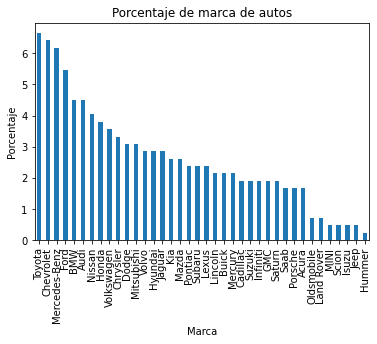

In [42]:
porcentaje_modelos = (df_coches['Marca'].value_counts(normalize=True) * 100)
print(porcentaje_modelos)
porcentaje_modelos.plot(kind='bar')
plt.title('Porcentaje de marca de autos')
plt.ylabel('Porcentaje')
plt.show()

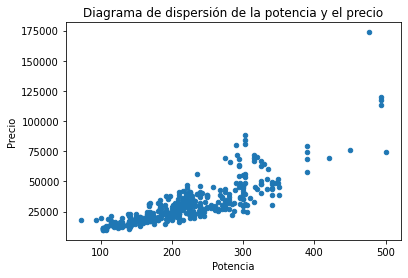

In [45]:
scatter_plot = df_coches.plot.scatter(x='Potencia', y='Precio', title = 'Diagrama de dispersión de la potencia y el precio')

Explicación: Este ejercicio senti que tambien fue de aplicar puras funciones a las columnas de las cuales queria sacar informacion, para este ejercicio investigue un poco mas sobre las funciones que se pueden aplicar a un DF y a sus columnas, asi fue como encontre nuevas funciones que me fueron muy utilices y me hicieron mas sencillo el visualizar la informacion que se me requeria aunque el saber la sintaxis de esta fue algo complicado, ya aplicandolo y probando se me hizo mas facil y coherente el utilizarlas.